# Laboratorium 6 - Regresja Liniowa

Celem laboratorium jest praktyczna implementacja i wykorzystanie regresji liniowej. Zakładam, że zagadnienia teoretyczne związane z regresją liniową są znane z wykładu, bądź z podstaw matematyki. Jeżeli nie - wiedzę należy nadrobić we własnym zakresie.

Zacznijmy od importu bibliotek i wygenerowania przykładowych danych.ych.

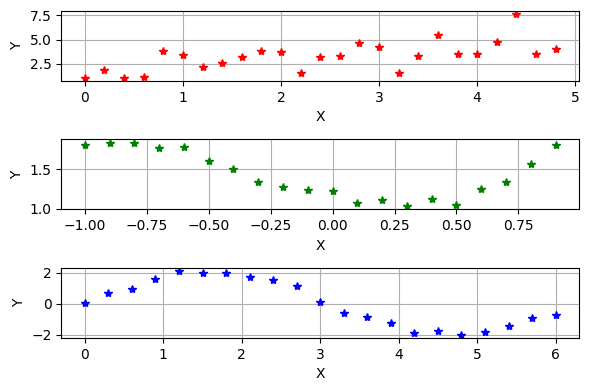

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(12345)


# Funkcja liniowa + szum
x1 = np.arange(0, 5, 0.2)
a = 0.7
b = 1.3
y1 = a*x1 + b + np.random.randn(x1.size)

# Wielomian + szum
x2 = np.arange(-1, 1, 0.1)
a3 = 0.9
a2 = 0.8
a1 = -0.7
a0 = 1.2
y2 = a3*x2**3 + a2*x2**2 + a1*x2**1 + a0*x2**0 + np.random.randn(x2.size)*0.05

# Sinus + szum
x3 = np.arange(0, 2*np.pi, 0.3)
y3 = 2*np.sin(x3) + np.random.randn(x3.size)*0.2

# Wizualizacja
plt.figure(dpi=100)
plt.subplot(3, 1, 1)
plt.plot(x1, y1, "r*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(x2, y2, "g*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(x3, y3, "b*")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()

Następnie wykorzystaj gotową funkcję w bibliotece sklearn do regresji liniowej i wyznacz wcześniej zadane parametry modelu oraz dokonaj wizualizacji podobnej do wizualizacji poniżej. 

Linear function coefficients:  [0.6591635316777497, 1.7119047927184106]
Polynomial coefficients: [0.8488911417112044, 0.8198749499646583, -0.7046315242331503, 1.1604636085156463]
Sine coefficients:  [ 0.          3.72869786 -1.74959072  0.18711961]


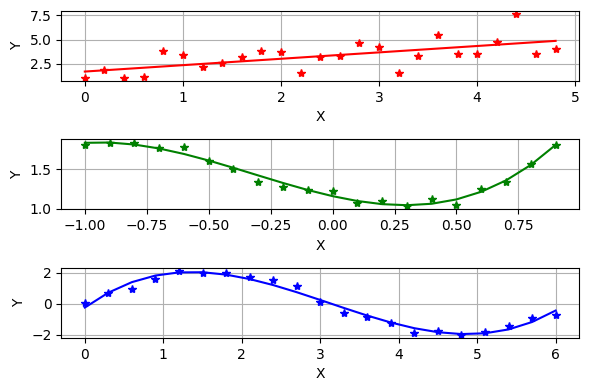

In [2]:
def calculate_regresion(x, y):
    reg = lm.LinearRegression()
    x = x.reshape(-1, 1)
    reg.fit(x, y)
    return reg, reg.predict(x)

def calculate_polynomial_regresion(x, y):
    x = x.reshape(-1, 1)
    reg = PolynomialFeatures(degree=3)
    
    x_poly = reg.fit_transform(x)
    model = lm.LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    return model, y_poly_pred


reg1, y1_pred = calculate_regresion(x1, y1)
reg2, y2_pred = calculate_polynomial_regresion(x2, y2)
reg3, y3_pred = calculate_polynomial_regresion(x3, y3)

print("Linear function coefficients: ", [reg1.coef_[0], reg1.intercept_])
print("Polynomial coefficients:", [*reg2.coef_[:0:-1], reg2.intercept_])
print("Sine coefficients: ", reg3.coef_)

plt.figure(dpi=100)
plt.subplot(3, 1, 1)
plt.plot(x1, y1, "r*")
plt.plot(x1, y1_pred, "red")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(x2, y2, "g*")
plt.plot(x2, y2_pred, "green")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(x3, y3, "b*")
plt.plot(x3, y3_pred, "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.tight_layout()


Dlaczego się różnią? Co się stanie jeżeli zwiększymy liczbę punktów? Co się stanie jeżeli usuniemy szum? Skąd nazwa "regresja liniowa" skoro wykorzystujemy dowolne funkcje nieliniowe?
Powyższe zagadnienie może się przydać do sprawozdań na kolejnych przedmiotach, gdzie będzie trzeba "dofitować" zadaną (znaną) funkcję do otrzymanych danych (na np. metrologii, biopomiarach, biofizyce).

W kolejnym kroku zaimplementuj regresją liniową samodzielnie na dwa sposoby: korzystając z metody spadku gradientowego (w wersji uproszczonej, kończącą obliczenia po z góry zdefiniowanej liczbie iteracji) oraz w wersji opartej o obliczenia macierzowe (dla dowolnej kombinacji liniowej, działanie analogicznie do wcześniej wykorzystaniej funkcji z biblioteki sklearn).


In [3]:
def our_linear_regression_iterative(X, y, learning_rate=0.01, num_iters=1000):
    """
    X - macierz próbek/cech
    y - wektor przyjmowanych wartości    
    """
    n = len(X)
    m = 0
    c = 0
    for i in range(num_iters): 
        Y_pred = m * X + c 
        D_m = (-2/n) * sum(X * (y - Y_pred)) 
        D_c = (-2/n) * sum(y - Y_pred)  
        m = m - learning_rate * D_m 
        c = c - learning_rate * D_c  
    return c, m

def our_linear_regression_matrix(X, y):
    n = np.size(X) 
    m_x, m_y = np.mean(X), np.mean(y) 
    m = (np.sum(y * X) - n * m_y * m_x ) / ( np.sum(X * X) - n * m_x * m_x )
    c = m_y - m * m_x 
    return c, m 

Przykładowy rezultat:

In [4]:
print("Coefficients from our_linear_regiression_iterative for linear:", our_linear_regression_iterative(x1, y1))
print("Coefficients from our_linear_regiression_matrix for linear:", our_linear_regression_matrix(x1, y1))
print("Coefficients from our_linear_regiression_iterative for polynomial:", our_linear_regression_iterative(x2, y2))
print("Coefficients from our_linear_regiression_matrix for polynomial:", our_linear_regression_matrix(x2, y2))

print("Coefficients from our_linear_regiression_iterative for sine:", our_linear_regression_iterative(x3, y3))
print("Coefficients from our_linear_regiression_matrix for sine:", our_linear_regression_matrix(x3, y3))

Coefficients from our_linear_regiression_iterative for linear: (1.7012015335589832, 0.6625443598289482)
Coefficients from our_linear_regiression_matrix for linear: (1.7119047927184095, 0.6591635316777501)
Coefficients from our_linear_regiression_iterative for polynomial: (1.4142305176573835, -0.2736717975152133)
Coefficients from our_linear_regiression_matrix for polynomial: (1.4142142973981016, -0.2738887696360497)
Coefficients from our_linear_regiression_iterative for sine: (1.844767674914974, -0.6055407548960616)
Coefficients from our_linear_regiression_matrix for sine: (1.8566299452841184, -0.6084947355873019)


Jakie są wady i zalety obu z powyższych implementacji? Do jakiego typu problemów może być lepsza metoda oparta o spadek gradientowy, a do jakich metoda oparta o bezpośrednie przekształcenia macierzowe? Zapoznaj się z podstawowymi sposobami oceny poprawności wyznaczonego modelu i spróbuj dokonać oceny wyznaczonych parametrów.

Regresja liniowa jest najbardziej podstawową metodą wykorzystwaną do problemów regresji. Niemniej jednak, jest to metoda raczej historyczna, która nie znajduje zastosowania dla większości rzeczywistych, wielowymiarowych problemów, gdzie state-of-the-art oparty jest o metody uczenia głębokiego: https://arxiv.org/pdf/1803.08450.pdf